## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime

## Data Import

In [ ]:
!gdown 1_8BRr1MykgxihoDlQjdLKwM9KTEsQenW

Downloading...
From: https://drive.google.com/uc?id=1_8BRr1MykgxihoDlQjdLKwM9KTEsQenW
To: /content/Q1_data.csv
100% 266k/266k [00:00<00:00, 131MB/s]


In [ ]:
df = pd.read_csv('./Q1_data.csv', index_col=0)

In [ ]:
df

,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10
...,...,...,...,...,...,...,...,...,...,...,...
1451,BTC,Bitcoin,2022-11-07T23:59:59.999Z,2022-11-07T02:18:00.000Z,2022-11-07T22:33:00.000Z,20924.620484,20602.816725,21053.246150,20489.973344,3.955964e+11,5.351085e+10
1452,BNB,BNB,2022-12-24T23:59:59.999Z,2022-12-24T00:02:00.000Z,2022-12-24T12:32:00.000Z,246.151646,244.635529,246.181715,243.953043,3.913335e+10,2.806274e+08
1453,ETH,Ethereum,2023-04-18T23:59:59.999Z,2023-04-18T11:51:00.000Z,2023-04-18T01:16:00.000Z,2075.855262,2104.537267,2121.531519,2057.653862,2.512149e+11,9.134015e+09
1454,ETH,Ethereum,2022-10-18T23:59:59.999Z,2022-10-18T00:35:00.000Z,2022-10-18T19:17:00.000Z,1331.669921,1310.447037,1339.085967,1291.660699,1.603645e+11,1.041675e+10


## EDA and Data Visualization

### Volume vs. Market Cap (Per Day)

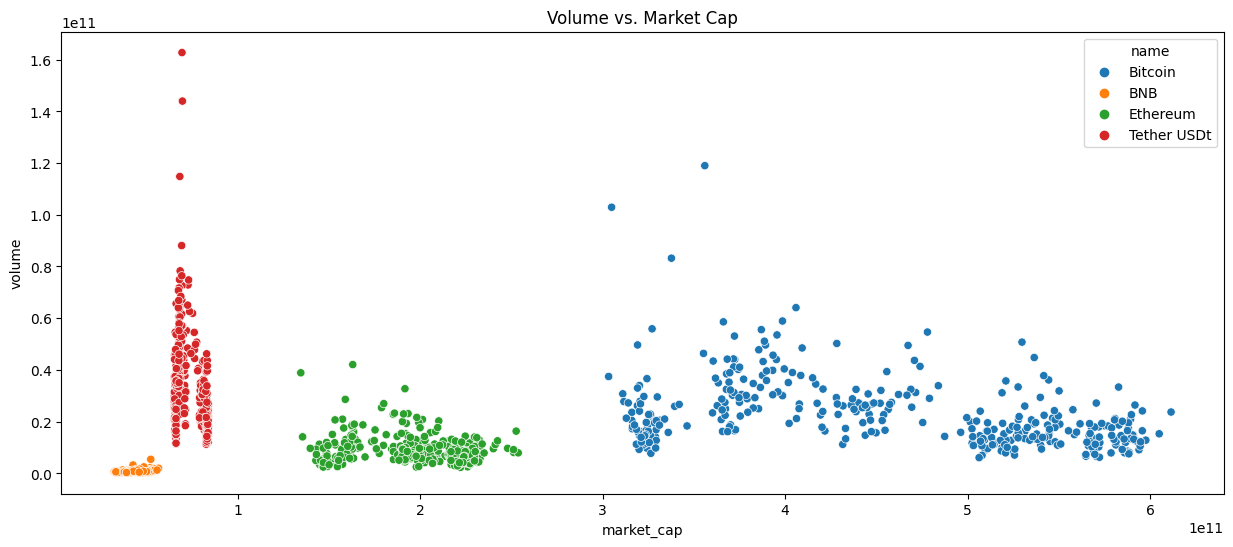

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(df, x='market_cap', y='volume', ax=ax, hue='name')
ax.set_title('Volume vs. Market Cap');

### Openning Price vs. Closing Price (Per Day)

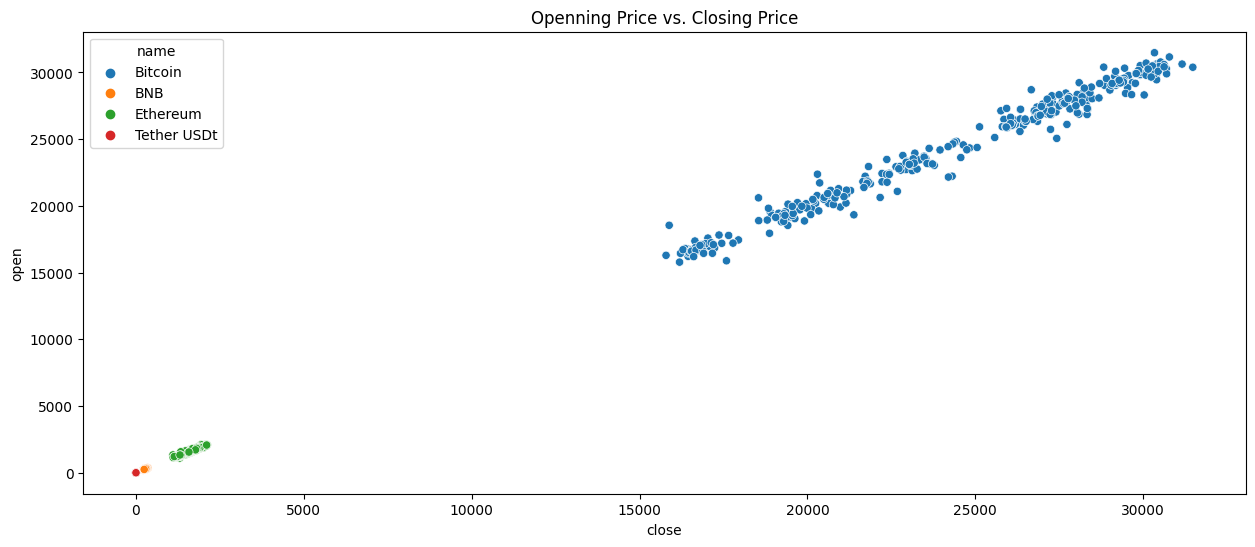

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(df, x='close', y='open', ax=ax, hue='name')
ax.set_title('Openning Price vs. Closing Price');

### Highest Price vs. Lowest Price (Per Day)

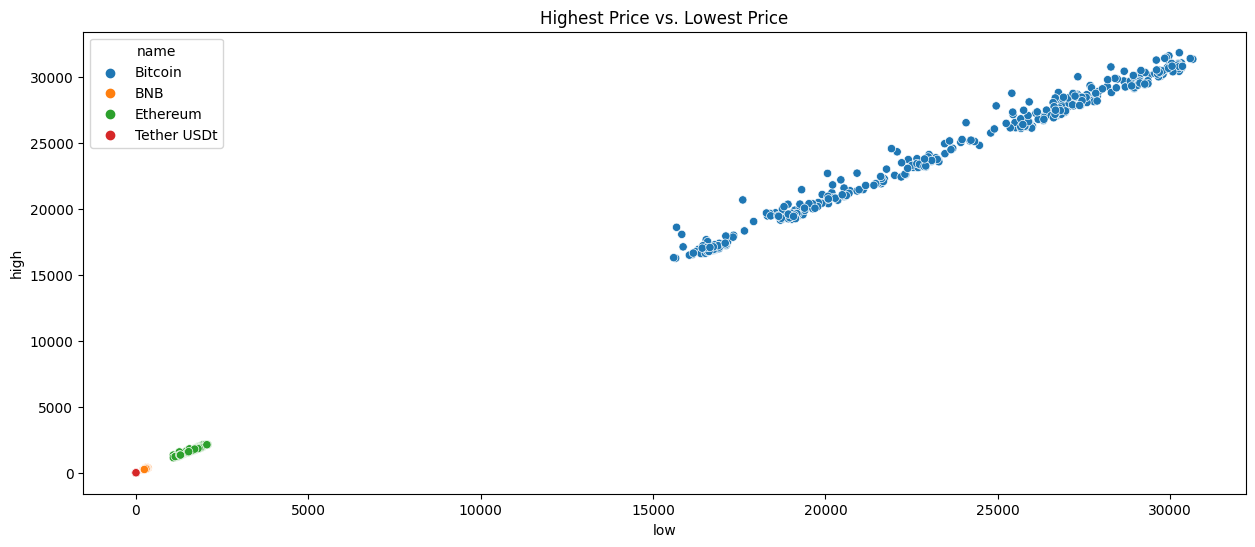

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(df, x='low', y='high', ax=ax, hue='name')
ax.set_title('Highest Price vs. Lowest Price');

### Candlestick Charts

In [ ]:
def plot_candlestick(df, coin_name):
  coin = df[df['name'] == coin_name].sort_values('time_stamp')
  fig = go.Figure(
      data=[go.Candlestick(x=coin['time_stamp'],
      open=coin['open'],
      high=coin['high'],
      low=coin['low'],
      close=coin['close'])]
  )

  fig.update_layout(
    title=f'{coin_name} Candlestick',
    yaxis_title=f'{coin_name} Price',\
  )

  fig.show()

#### Bitcoin

In [ ]:
plot_candlestick(df, 'Bitcoin')

#### BNB

In [ ]:
plot_candlestick(df, 'BNB')

#### Ethereum

In [ ]:
plot_candlestick(df, 'Ethereum')

#### Tether USDt

In [ ]:
plot_candlestick(df, 'Tether USDt')

## Experimenting with Machine Learning Models

### K-Means Clustering

#### Decision Boundary Plot Function

In [ ]:
def plot_decision_boundary(df, model, ax, clusters=5):
  n = df.shape[0]
  x_min, x_max = df[:, 0].min() - 1, df[:, 0].max() + 1
  y_min, y_max = df[:, 1].min() - 1, df[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)


  ax.imshow(
      Z,
      interpolation='nearest',
      extent=(xx.min(), xx.max(), yy.min(), yy.max()),
      cmap=plt.cm.Paired,
      aspect='auto',
      origin='lower',
  )

  ax.plot(df[:, 0], df[:, 1], 'k.', markersize=2)

  # Plot the centroids as a white X
  centroids = model.cluster_centers_
  ax.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker='x',
      s=169,
      linewidths=3,
      color='w',
      zorder=10,
  )
  ax.set_title(f'K-means clustering on the top 4 crypto currencies (with {clusters} clusters) \n and inertia of {model.inertia_}')
  ax.set_ylabel('Volume')
  ax.set_xlabel('Market Cap');

#### Training Model with 5 Clusters

In [ ]:
from sklearn.cluster import KMeans

df_mv = df[['market_cap', 'volume']].to_numpy()
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans.fit(df_mv)

KMeans(n_clusters=5, n_init='auto', random_state=42)

##### Plotting Decision Boundary and Scatter Plot

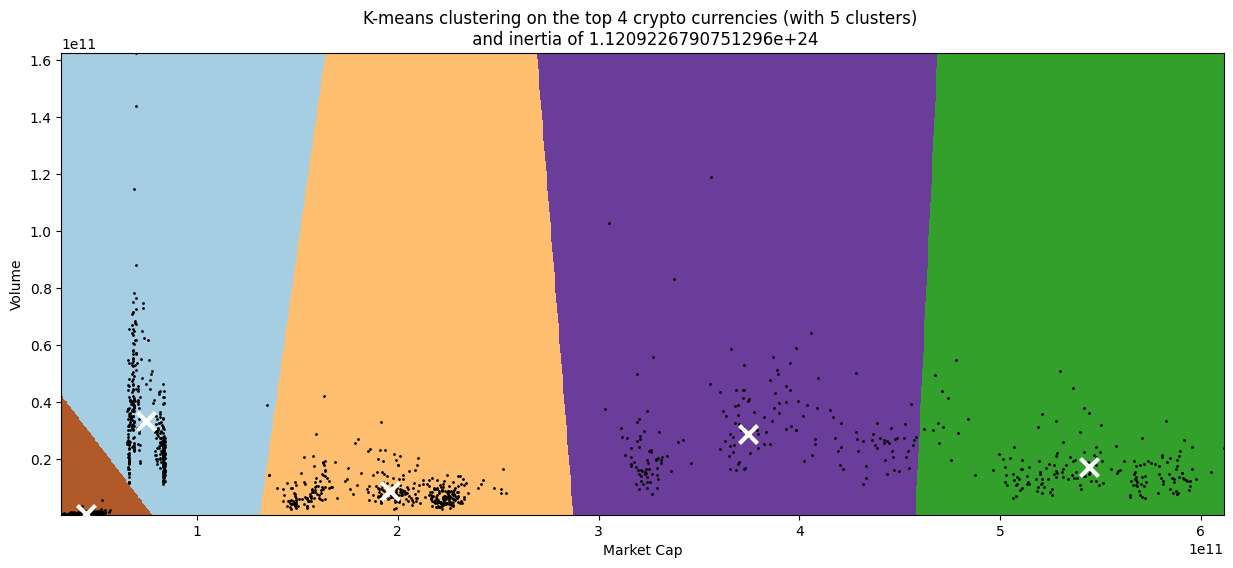

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

plot_decision_boundary(df_mv, kmeans, ax)

#### Training Model and Plotting Decision Boundaries with 1 to 10 Clusters

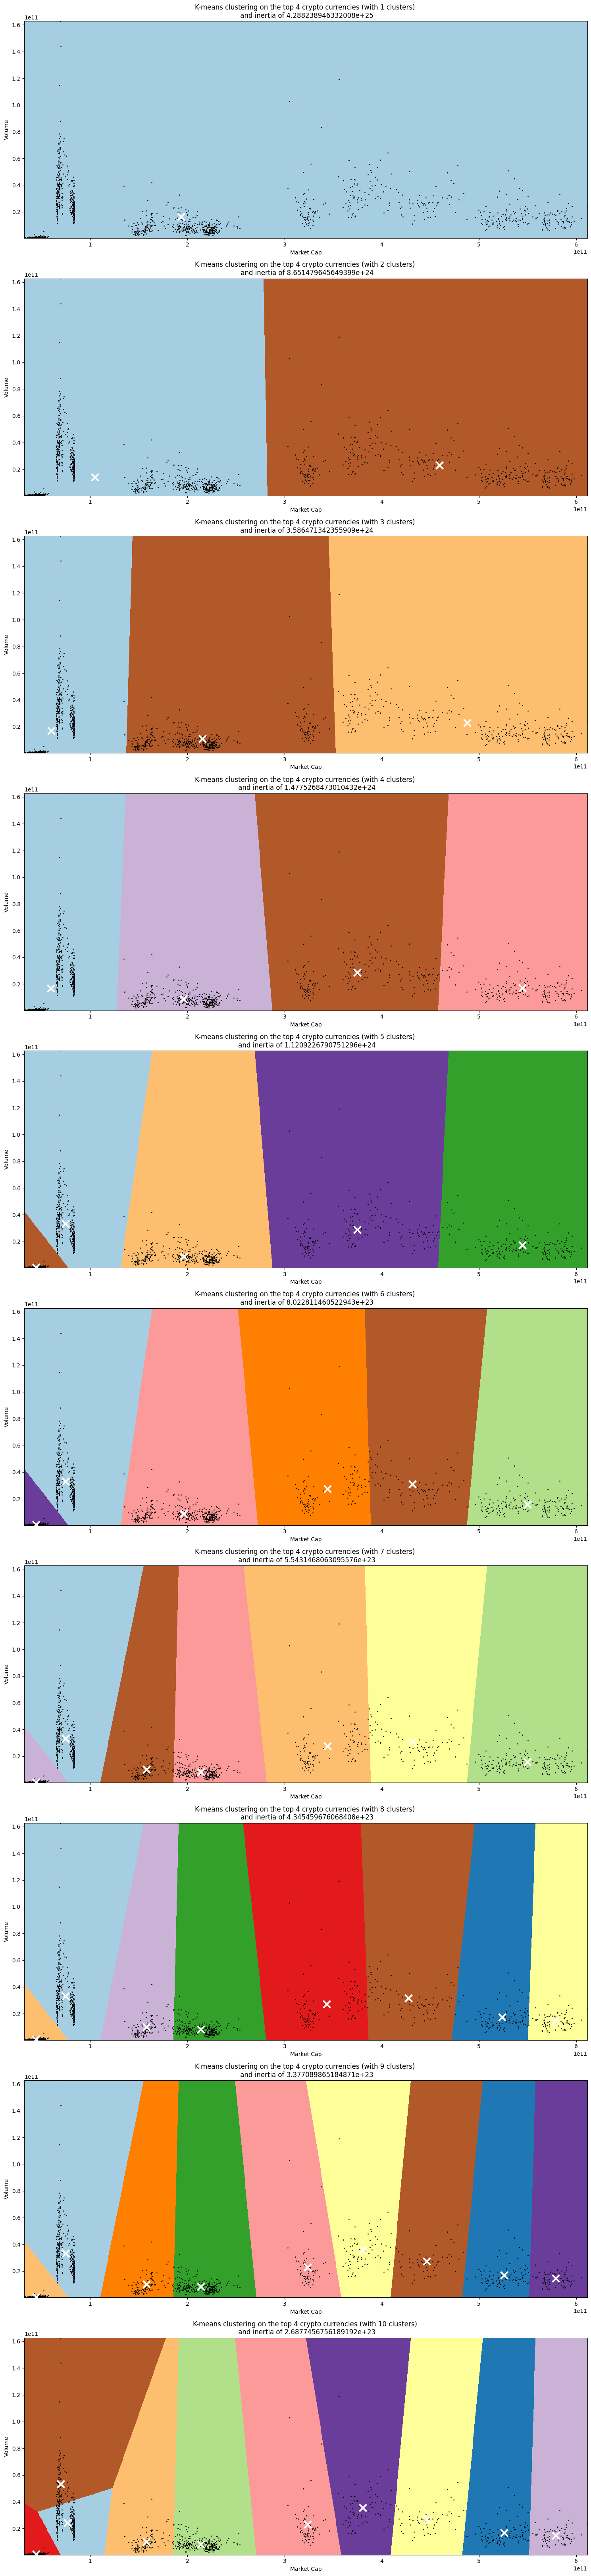

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15, 65))

df_mv = df[['market_cap', 'volume']].to_numpy()
i = 0

for n_clusters in range(1, 11):
  kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
  kmeans.fit(df_mv)
  plot_decision_boundary(df_mv, kmeans, axes[i], n_clusters)
  i += 1

plt.tight_layout()

### DBScan

#### Training Model with 5 Clusters

In [ ]:
from sklearn.metrics import silhouette_score as shs

def Gridsearch(combinations, X):
  scores = []
  all_label = []

  for i, (eps, num_samples, metric) in enumerate(combinations):
    db = DBSCAN(eps=eps, min_samples=num_samples, metric=metric).fit(X)
    labels = db.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    if(num_clusters < 3) or (num_clusters > 6):
      scores.append(-20)
      all_label.append('Poor')
      # print(f'Iteration #{i}')
      # print(f'Iteration #{i}, epsilon={eps}, min_samples={num_samples}, metric={metric}, number of clusters={num_clusters}.')
      continue
    scores.append(shs(X, labels))
    all_label.append(labels)
    print(f'Iteration #{i}, epsilon={eps}, min_samples={num_samples}, metric={metric}, number of clusters={num_clusters}.')
    print(f'Iteration #{i},', ', score : ', scores[-1], ' number of clusters : ', num_clusters, '\n\n')
  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_label[best_index]
  best_score = scores[best_index]
  return {
      'best_epsilon': best_parameters[0],
      'best_min_samples': best_parameters[1],
      'best_metric': best_parameters[2],
      'best_labels': best_labels,
      'best_score': best_score
  }

In [ ]:
import itertools


epsilon = np.linspace(0.0001, 1, 100)
min_samples = np.arange(1, 200, 20)
metric = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
combinations = list(itertools.product(epsilon, min_samples, metric))
len(combinations)

6000

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_mv = scaler.fit_transform(df_mv)

best_params = Gridsearch(combinations, df_mv)

In [ ]:
best_params

{'best_epsilon': 0.2829,
 'best_min_samples': 21,
 'best_metric': 'euclidean',
 'best_labels': array([0, 0, 1, ..., 3, 3, 4]),
 'best_score': 0.5927996007134657}

In [ ]:
from sklearn.cluster import DBSCAN

df_mv = df[['market_cap', 'volume']].to_numpy()
scaler = StandardScaler()
df_mv = scaler.fit_transform(df_mv)

db = DBSCAN(eps=0.2829,
            min_samples=21,
            metric='euclidean')
db.fit(df_mv)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 74


#### Visualization

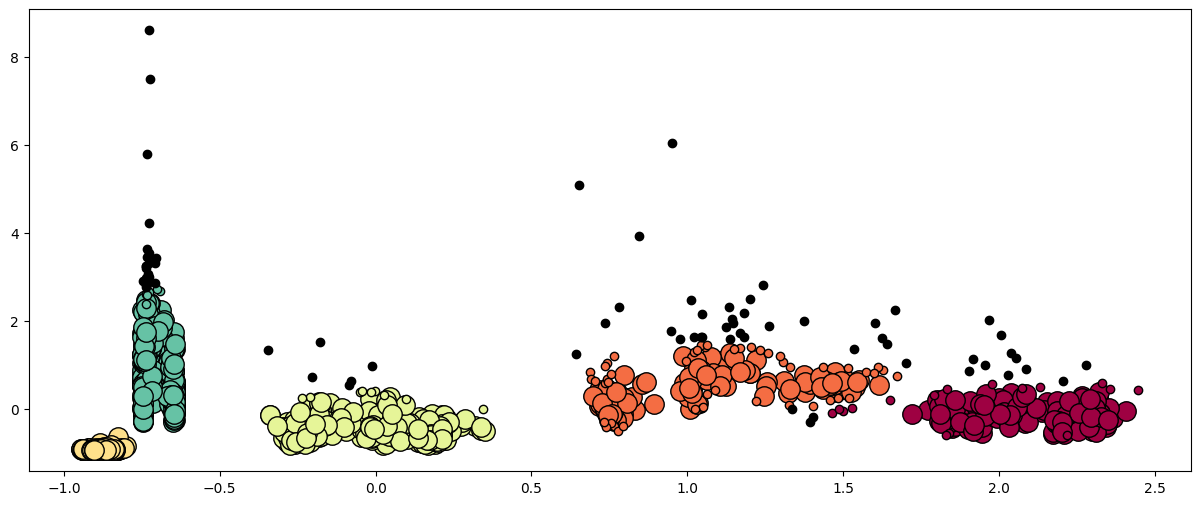

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df_mv[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df_mv[class_member_mask & ~core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

# ax.set_title(f"Estimated number of clusters: {n_clusters_}")